# Predicting Solar Panel Counts with County Data

**Developed by: JC Dy & Wilson Wang**

In this project, we will be working with a number of different datasets. The first we examine is a dataset of education by county....

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

## Solar Panel Dataset

We will first load the solar panel data set, which was obtained from the Google Project Sunroof. We begin by cleaning the dataset and checking for repeated, missing, or unneeded values and information, and then explore and visualize the data to assist with feature engineering for our model.

In [35]:
sunroof = pd.read_csv("data/sunroofByCounty.csv")
sunroof.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,Acadia Parish,Louisiana,30.480765,30.054137,-92.141898,-92.629793,30.280735,-92.355786,1087.15,362,...,9.995661e+05,2.387640e+06,1.415127e+06,1.684958e+06,5.161133e+06,18009.16406,1.164842e+07,"[[0,62],[5,66],[10,60],[15,59],[20,39],[25,19]...",7.793978e+03,0
1,Ada County,Idaho,43.805558,43.146687,-115.998789,-116.513522,43.613109,-116.311757,1156.85,133939,...,5.387239e+07,1.055632e+09,4.744878e+08,7.089204e+08,1.092363e+09,16967.80168,3.385276e+09,"[[0,12980],[5,32607],[10,38390],[15,24736],[20...",9.001732e+05,333
2,Adams County,Colorado,40.000733,39.738577,-103.723147,-105.052979,39.879419,-104.918298,1246.10,117401,...,1.826940e+07,7.158716e+08,3.635472e+08,4.020793e+08,1.415979e+09,11325.30869,2.915746e+09,"[[0,24956],[5,49920],[10,23209],[15,8129],[20,...",1.775350e+06,2223
3,Adams County,Pennsylvania,40.068780,39.720016,-76.957161,-77.464169,39.846871,-77.150441,997.05,4500,...,4.286321e+06,2.210173e+07,2.234452e+07,1.889155e+07,3.672815e+07,12304.57323,1.043523e+08,"[[0,795],[5,1343],[10,877],[15,594],[20,305],[...",6.631176e+04,0
4,Aiken County,South Carolina,33.871800,33.201889,-81.193502,-82.007226,33.526341,-81.764460,1093.95,49051,...,8.508118e+07,3.292865e+08,1.973077e+08,2.153019e+08,3.459476e+08,15336.44904,1.172925e+09,"[[0,5920],[5,12846],[10,12402],[15,8113],[20,4...",6.885615e+05,83


In [36]:
sunroof.columns

Index(['region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max', 'lng_min',
       'lat_avg', 'lng_avg', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_offset_metric_tons', 'existing_installs_count'],
      dtype='object')

## Cleaning the Solar Panel Dataset

Among the columns available to us, we choose to retain only the columns containing data useful to us when constructing our machine learning prediction model.
We must keep the state_name and County (region_name) columns, and choose to retain only the 2012-2016 education data:

In [38]:
sunroof.loc[:,['region_name', 'state_name', 'count_qualified', 'yearly_sunlight_kwh_kw_threshold_avg',
               'percent_covered', 'percent_qualified',
               'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
               'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
               'number_of_panels_total', 'kw_median', 'kw_total',
               'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
               'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
               'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
               'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
               'carbon_offset_metric_tons', 'existing_installs_count']]

,region_name,state_name,count_qualified,yearly_sunlight_kwh_kw_threshold_avg,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,Acadia Parish,Louisiana,362,1087.15,1.295852,81.715576,3474,6970,4533,5398,...,9.995661e+05,2.387640e+06,1.415127e+06,1.684958e+06,5.161133e+06,18009.164060,1.164842e+07,"[[0,62],[5,66],[10,60],[15,59],[20,39],[25,19]...",7.793978e+03,0
1,Ada County,Idaho,133939,1156.85,86.156364,90.224992,183489,2932039,1517496,2190037,...,5.387239e+07,1.055632e+09,4.744878e+08,7.089204e+08,1.092363e+09,16967.801680,3.385276e+09,"[[0,12980],[5,32607],[10,38390],[15,24736],[20...",9.001732e+05,333
2,Adams County,Colorado,117401,1246.10,92.906285,87.461913,58739,1859313,1050680,1205016,...,1.826940e+07,7.158716e+08,3.635472e+08,4.020793e+08,1.415979e+09,11325.308690,2.915746e+09,"[[0,24956],[5,49920],[10,23209],[15,8129],[20,...",1.775350e+06,2223
3,Adams County,Pennsylvania,4500,997.05,17.958957,87.006961,16651,70798,78169,68634,...,4.286321e+06,2.210173e+07,2.234452e+07,1.889155e+07,3.672815e+07,12304.573230,1.043523e+08,"[[0,795],[5,1343],[10,877],[15,594],[20,305],[...",6.631176e+04,0
4,Aiken County,South Carolina,49051,1093.95,68.372367,86.296622,297265,984740,645255,693428,...,8.508118e+07,3.292865e+08,1.973077e+08,2.153019e+08,3.459476e+08,15336.449040,1.172925e+09,"[[0,5920],[5,12846],[10,12402],[15,8113],[20,4...",6.885615e+05,83
5,Alachua County,Florida,42834,1108.40,77.907543,68.675046,349719,973293,610023,734622,...,1.016266e+08,3.277244e+08,1.887428e+08,2.286634e+08,5.396909e+08,17078.209960,1.386448e+09,"[[0,5865],[5,9032],[10,8565],[15,6470],[20,394...",7.410849e+05,912
6,Alamance County,North Carolina,26057,1081.20,41.934685,80.942470,83130,437663,306755,345764,...,2.317810e+07,1.459370e+08,9.210220e+07,1.048986e+08,3.760344e+08,11957.316480,7.421503e+08,"[[0,4770],[5,8772],[10,5500],[15,2742],[20,129...",4.356767e+05,16
7,Alameda County,California,372427,1229.10,96.583429,94.318029,2488057,5840749,4452530,5363907,...,7.914170e+08,2.234401e+09,1.515337e+09,1.913681e+09,4.658258e+09,17544.439420,1.111309e+10,"[[0,41866],[5,99652],[10,86953],[15,66337],[20...",3.029093e+06,14127
8,Albany County,New York,73594,961.35,90.320851,79.414272,112549,1127695,777304,629049,...,2.780296e+07,3.282363e+08,2.102291e+08,1.670549e+08,1.002505e+09,8989.818933,1.735828e+09,"[[0,16509],[5,28561],[10,14802],[15,5251],[20,...",6.343042e+05,577
9,Albemarle County,Virginia,10992,1048.90,39.814769,68.002970,29802,185863,148753,130742,...,8.023626e+06,5.989110e+07,4.430155e+07,3.797444e+07,1.360155e+08,8575.624683,2.862062e+08,"[[0,3561],[5,3578],[10,1548],[15,606],[20,360]...",1.830704e+05,13


In [39]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [45]:
sunroof['State'] = sunroof.apply(lambda row : us_state_abbrev[row['state_name']], axis=1)

In [46]:
sunroof.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count,State
0,Acadia Parish,Louisiana,30.480765,30.054137,-92.141898,-92.629793,30.280735,-92.355786,1087.15,362,...,2.387640e+06,1.415127e+06,1.684958e+06,5.161133e+06,18009.16406,1.164842e+07,"[[0,62],[5,66],[10,60],[15,59],[20,39],[25,19]...",7.793978e+03,0,LA
1,Ada County,Idaho,43.805558,43.146687,-115.998789,-116.513522,43.613109,-116.311757,1156.85,133939,...,1.055632e+09,4.744878e+08,7.089204e+08,1.092363e+09,16967.80168,3.385276e+09,"[[0,12980],[5,32607],[10,38390],[15,24736],[20...",9.001732e+05,333,ID
2,Adams County,Colorado,40.000733,39.738577,-103.723147,-105.052979,39.879419,-104.918298,1246.10,117401,...,7.158716e+08,3.635472e+08,4.020793e+08,1.415979e+09,11325.30869,2.915746e+09,"[[0,24956],[5,49920],[10,23209],[15,8129],[20,...",1.775350e+06,2223,CO
3,Adams County,Pennsylvania,40.068780,39.720016,-76.957161,-77.464169,39.846871,-77.150441,997.05,4500,...,2.210173e+07,2.234452e+07,1.889155e+07,3.672815e+07,12304.57323,1.043523e+08,"[[0,795],[5,1343],[10,877],[15,594],[20,305],[...",6.631176e+04,0,PA
4,Aiken County,South Carolina,33.871800,33.201889,-81.193502,-82.007226,33.526341,-81.764460,1093.95,49051,...,3.292865e+08,1.973077e+08,2.153019e+08,3.459476e+08,15336.44904,1.172925e+09,"[[0,5920],[5,12846],[10,12402],[15,8113],[20,4...",6.885615e+05,83,SC


## Education Dataset

We will first load the education data set, which was obtained from the Census Bureau, containing data from 1970, 1980, 1990, 2000, and 2012-2016. We begin by cleaning the dataset and checking for repeated, missing, or unneeded values and information, and then explore and visualize the data to assist with feature engineering for our model.

In [7]:
education = pd.read_csv("data/educationByCounty.csv")
education.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016",Unnamed: 47
0,0.0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730",...,24.4,"27,818,380","58,820,411","62,242,569","64,767,787",13.0,27.5,29.1,30.3,NaN
1,1000.0,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287",...,19.0,"496,036","1,009,593","972,703","783,076",15.2,31.0,29.8,24.0,NaN
2,1001.0,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,18.0,"4,528","12,519","10,451","8,968",12.4,34.3,28.7,24.6,NaN
3,1003.0,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334",...,23.1,"13,956","40,154","44,486","41,350",10.0,28.7,31.8,29.5,NaN
4,1005.0,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,10.9,"4,824","6,422","4,775","2,366",26.2,34.9,26.0,12.9,NaN


In [8]:
education.columns

Index(['FIPS Code', 'State', 'Area name', '2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code', 'Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 years), 1970',
       'Four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Less than a high school diploma, 1980',
       'High school diploma only, 1980', 'Some college (1-3 years), 1980',
       'Four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adults completing some college (1-3 years

## Cleaning the Education Dataset

Notice that we have columns containing extraneous information that will not be useful in building our model. We will focus on data that has been collected more recently. One reason for this is that the other datasets we will be working with have data that is generally 2007 and onwards. In order to ensure accuracy for our predictions, we filter out the outdated data from our dataset.

We must keep the State and County (Area name) columns, and choose to retain only the 2012-2016 education data:

In [11]:
education = education.loc[:,['State', 'Area name','Less than a high school diploma, 2012-2016',
                   'High school diploma only, 2012-2016',
                   "Some college or associate's degree, 2012-2016",
                   "Bachelor's degree or higher, 2012-2016",
                   'Percent of adults with less than a high school diploma, 2012-2016',
                   'Percent of adults with a high school diploma only, 2012-2016',
                   "Percent of adults completing some college or associate's degree, 2012-2016",
                   "Percent of adults with a bachelor's degree or higher, 2012-2016"]]

In [12]:
education.head()

,State,Area name,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
0,US,United States,"27,818,380","58,820,411","62,242,569","64,767,787",13.0,27.5,29.1,30.3
1,AL,Alabama,"496,036","1,009,593","972,703","783,076",15.2,31.0,29.8,24.0
2,AL,Autauga County,"4,528","12,519","10,451","8,968",12.4,34.3,28.7,24.6
3,AL,Baldwin County,"13,956","40,154","44,486","41,350",10.0,28.7,31.8,29.5
4,AL,Barbour County,"4,824","6,422","4,775","2,366",26.2,34.9,26.0,12.9


In [18]:
# Which states have the most county education data?
education.groupby('State').agg('count').sort_values(by='Area name', ascending=False).head()

,Area name,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
State,,,,,,,,,
TX,255,255,255,255,255,255,255,255,255
GA,160,160,160,160,160,160,160,160,160
VA,136,134,134,134,134,134,134,134,134
KY,121,121,121,121,121,121,121,121,121
MO,116,116,116,116,116,116,116,116,116


In [19]:
# From above, we know the top states we have most data on
top_states = ['TX', 'GA', 'VA', 'KY', 'MO']

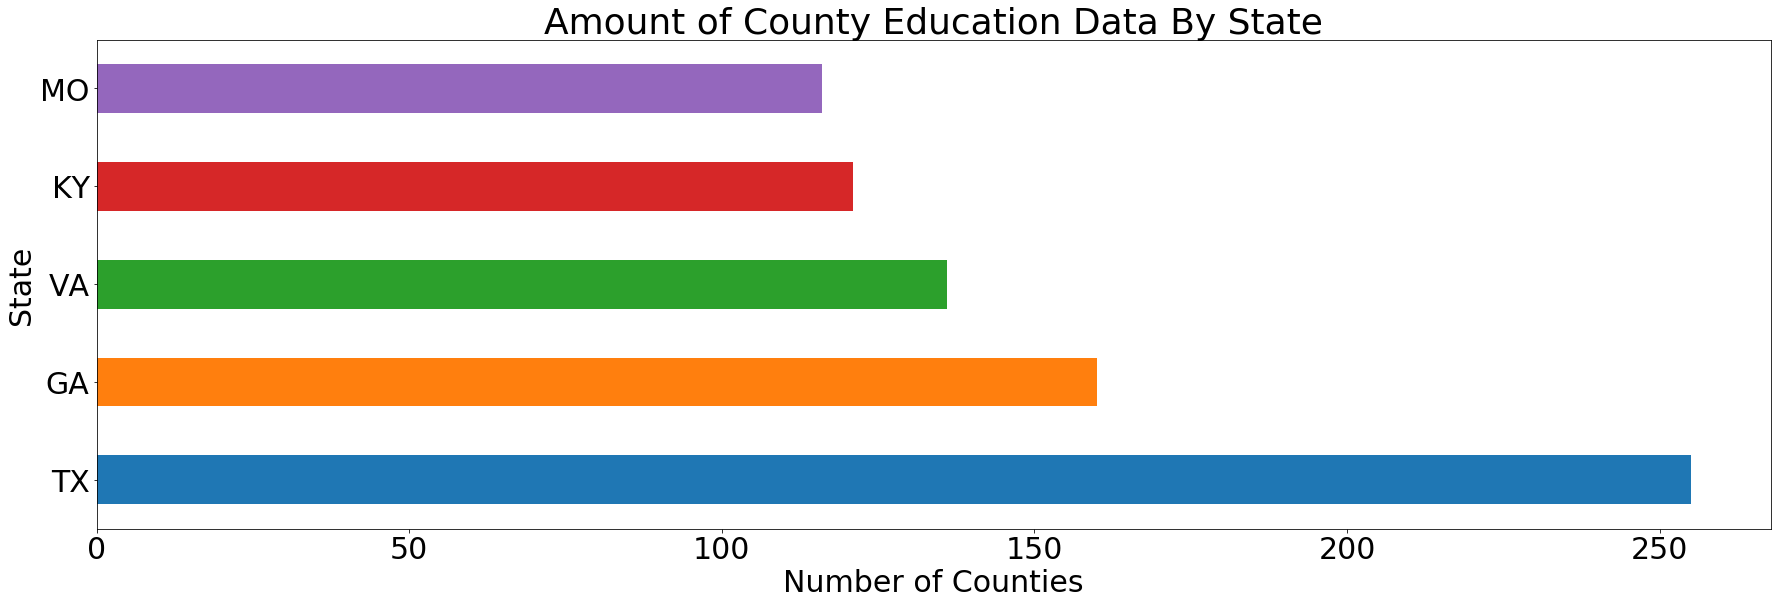

In [24]:
plt.figure(figsize=(30,9))
ax = education[education['State'].isin(top_states)]['State'].value_counts().plot(kind='barh')
ax.set_ylabel("State")
ax.set_xlabel("Number of Counties")
ax.set_title("Amount of County Education Data By State");
plt.rcParams.update({'font.size': 30})

In [26]:
num_states = len(education.groupby(education['State']))
state_list = set(education['State'].tolist())

In [31]:
education.groupby('State').agg('mean')\
.sort_values(by="Percent of adults with a bachelor's degree or higher, 2012-2016", ascending=False).head()

,"Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
State,,,,
DC,10.000000,18.000000,16.600000,55.400000
MA,9.140000,26.080000,25.773333,38.980000
RI,10.233333,25.416667,26.333333,38.016667
CT,9.133333,28.344444,26.344444,36.188889
NJ,11.018182,29.590909,24.104545,35.286364


In [ ]:
unemployment = pd.read_csv("data/unemploymentByCounty.csv")

In [47]:
sunroof.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count,State
0,Acadia Parish,Louisiana,30.480765,30.054137,-92.141898,-92.629793,30.280735,-92.355786,1087.15,362,...,2.387640e+06,1.415127e+06,1.684958e+06,5.161133e+06,18009.16406,1.164842e+07,"[[0,62],[5,66],[10,60],[15,59],[20,39],[25,19]...",7.793978e+03,0,LA
1,Ada County,Idaho,43.805558,43.146687,-115.998789,-116.513522,43.613109,-116.311757,1156.85,133939,...,1.055632e+09,4.744878e+08,7.089204e+08,1.092363e+09,16967.80168,3.385276e+09,"[[0,12980],[5,32607],[10,38390],[15,24736],[20...",9.001732e+05,333,ID
2,Adams County,Colorado,40.000733,39.738577,-103.723147,-105.052979,39.879419,-104.918298,1246.10,117401,...,7.158716e+08,3.635472e+08,4.020793e+08,1.415979e+09,11325.30869,2.915746e+09,"[[0,24956],[5,49920],[10,23209],[15,8129],[20,...",1.775350e+06,2223,CO
3,Adams County,Pennsylvania,40.068780,39.720016,-76.957161,-77.464169,39.846871,-77.150441,997.05,4500,...,2.210173e+07,2.234452e+07,1.889155e+07,3.672815e+07,12304.57323,1.043523e+08,"[[0,795],[5,1343],[10,877],[15,594],[20,305],[...",6.631176e+04,0,PA
4,Aiken County,South Carolina,33.871800,33.201889,-81.193502,-82.007226,33.526341,-81.764460,1093.95,49051,...,3.292865e+08,1.973077e+08,2.153019e+08,3.459476e+08,15336.44904,1.172925e+09,"[[0,5920],[5,12846],[10,12402],[15,8113],[20,4...",6.885615e+05,83,SC


In [48]:
education.head()

,State,Area name,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
0,US,United States,"27,818,380","58,820,411","62,242,569","64,767,787",13.0,27.5,29.1,30.3
1,AL,Alabama,"496,036","1,009,593","972,703","783,076",15.2,31.0,29.8,24.0
2,AL,Autauga County,"4,528","12,519","10,451","8,968",12.4,34.3,28.7,24.6
3,AL,Baldwin County,"13,956","40,154","44,486","41,350",10.0,28.7,31.8,29.5
4,AL,Barbour County,"4,824","6,422","4,775","2,366",26.2,34.9,26.0,12.9


## Joining the Datasets

We will join the sunroof datasets with all the external datasets that we have now cleaned.
We will merge on (state, county) pairs, as we have found that the county names are not unique.

In [54]:
pd.merge(sunroof, education,  how='left', left_on=['State','region_name'], right_on = ['State','Area name'])

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,State,Area name,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
0,Acadia Parish,Louisiana,30.480765,30.054137,-92.141898,-92.629793,30.280735,-92.355786,1087.15,362,...,LA,Acadia Parish,"9,829","16,173","9,611","4,456",24.5,40.4,24.0,11.1
1,Ada County,Idaho,43.805558,43.146687,-115.998789,-116.513522,43.613109,-116.311757,1156.85,133939,...,ID,Ada County,"15,326","61,575","100,729","104,188",5.4,21.8,35.7,37.0
2,Adams County,Colorado,40.000733,39.738577,-103.723147,-105.052979,39.879419,-104.918298,1246.10,117401,...,CO,Adams County,"54,142","86,439","95,040","67,888",17.8,28.5,31.3,22.4
3,Adams County,Pennsylvania,40.068780,39.720016,-76.957161,-77.464169,39.846871,-77.150441,997.05,4500,...,PA,Adams County,"8,631","29,599","17,011","15,460",12.2,41.9,24.1,21.9
4,Aiken County,South Carolina,33.871800,33.201889,-81.193502,-82.007226,33.526341,-81.764460,1093.95,49051,...,SC,Aiken County,"16,597","35,407","33,371","28,936",14.5,31.0,29.2,25.3
5,Alachua County,Florida,29.936905,29.417511,-82.050280,-82.657775,29.673462,-82.391530,1108.40,42834,...,FL,Alachua County,"11,474","33,688","44,695","63,784",7.5,21.9,29.1,41.5
6,Alamance County,North Carolina,36.249583,35.843793,-79.248243,-79.541837,36.070379,-79.412860,1081.20,26057,...,NC,Alamance County,"16,048","29,577","36,226","23,184",15.3,28.2,34.5,22.1
7,Alameda County,California,37.905009,37.456808,-121.486198,-122.339559,37.704505,-122.086503,1229.10,372427,...,CA,Alameda County,"141,393","200,371","282,921","488,594",12.7,18.0,25.4,43.9
8,Albany County,New York,42.820149,42.408811,-73.680408,-74.264127,42.682801,-73.819296,961.35,73594,...,NY,Albany County,"14,881","52,410","55,665","81,047",7.3,25.7,27.3,39.7
9,Albemarle County,Virginia,38.263139,37.725258,-78.209885,-78.837015,38.050714,-78.524524,1048.90,10992,...,VA,Albemarle County,"6,031","12,472","15,436","36,087",8.6,17.8,22.0,51.5


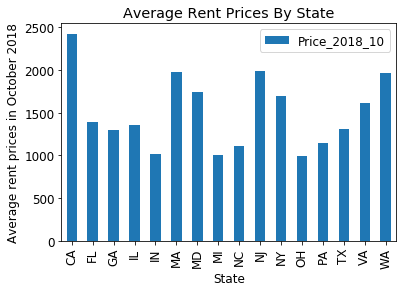

In [76]:
plt.rcParams.update({'font.size': 12})
#ax = sns.countplot(data=rents['Price_2018_10'], x=rents['State'], order=top_states)
ax = rents.loc[rents['State'].isin(top_states)].loc[:,['State', 'Price_2018_10']].groupby(["State"]).agg('mean').plot(kind="bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Average rent prices in October 2018")
ax.set_title("Average Rent Prices By State");

In [69]:
top_rents = rents.loc[rents['State'].isin(top_states)].loc[:,['State', 'Price_2018_10']].groupby(["State"]).agg('mean')

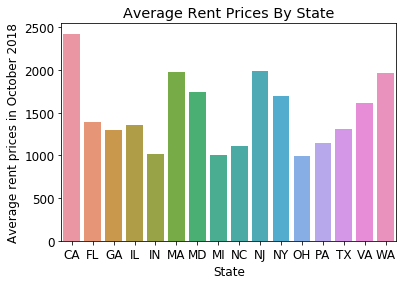

In [74]:
ax = sns.barplot(x="State", y="Price_2018_10", data=top_rents.reset_index())
ax.set_ylabel("Average rent prices in October 2018")
ax.set_title("Average Rent Prices By State");

In [40]:
homeless2014 = pd.read_csv("statehomelessness2014.csv")
homeless2014.head()

,State,Number of CoCs,"Total Homeless, 2014","Sheltered Homeless, 2014","Unsheltered Homeless, 2014","Homeless Individuals, 2014","Sheltered Homeless Individuals, 2014","Unsheltered Homeless Individuals, 2014","Homeless People in Families, 2014","Sheltered Homeless People in Families, 2014",...,"Unsheltered Chronically Homeless, 2014","Chronically Homeless Individuals, 2014","Sheltered Chronically Homeless Individuals, 2014","Unsheltered Chronically Homeless Individuals, 2014","Chronically Homeless People in Families, 2014","Sheltered Chronically Homeless People in Families, 2014","Unsheltered Chronically Homeless People in Families, 2014","Homeless Veterans, 2014","Sheltered Homeless Veterans, 2014","Unsheltered Homeless Veterans, 2014"
0,AK,2.0,"1,784","1,639",145,"1,209","1,109",100,575,530,...,69,182,119,63,24,18,6,178,160,18
1,AL,8.0,"4,561","3,518","1,043","3,115","2,373",742,"1,446","1,145",...,446,618,245,373,111,38,73,542,450,92
2,AR,6.0,"2,936","1,503","1,433","2,303","1,070","1,233",633,433,...,434,516,82,434,3,3,0,361,220,141
3,AZ,3.0,"10,495","7,926","2,569","6,194","3,851","2,343","4,301","4,075",...,643,904,303,601,55,13,42,858,635,223
4,CA,40.0,"113,952","42,515","71,437","90,765","24,857","65,908","23,187","17,658",...,"25,947","28,200","4,417","23,783","2,878",714,"2,164","12,096","4,457","7,639"


In [77]:
homeless2015 = pd.read_csv("statehomelessness2014.csv")
homeless2015.head()

,State,Number of CoCs,"Total Homeless, 2014","Sheltered Homeless, 2014","Unsheltered Homeless, 2014","Homeless Individuals, 2014","Sheltered Homeless Individuals, 2014","Unsheltered Homeless Individuals, 2014","Homeless People in Families, 2014","Sheltered Homeless People in Families, 2014",...,"Unsheltered Chronically Homeless, 2014","Chronically Homeless Individuals, 2014","Sheltered Chronically Homeless Individuals, 2014","Unsheltered Chronically Homeless Individuals, 2014","Chronically Homeless People in Families, 2014","Sheltered Chronically Homeless People in Families, 2014","Unsheltered Chronically Homeless People in Families, 2014","Homeless Veterans, 2014","Sheltered Homeless Veterans, 2014","Unsheltered Homeless Veterans, 2014"
0,AK,2.0,"1,784","1,639",145,"1,209","1,109",100,575,530,...,69,182,119,63,24,18,6,178,160,18
1,AL,8.0,"4,561","3,518","1,043","3,115","2,373",742,"1,446","1,145",...,446,618,245,373,111,38,73,542,450,92
2,AR,6.0,"2,936","1,503","1,433","2,303","1,070","1,233",633,433,...,434,516,82,434,3,3,0,361,220,141
3,AZ,3.0,"10,495","7,926","2,569","6,194","3,851","2,343","4,301","4,075",...,643,904,303,601,55,13,42,858,635,223
4,CA,40.0,"113,952","42,515","71,437","90,765","24,857","65,908","23,187","17,658",...,"25,947","28,200","4,417","23,783","2,878",714,"2,164","12,096","4,457","7,639"


In [41]:
homeless2017 = pd.read_csv("statehomelessness2017.csv")
homeless2017.head()

,CoC Number,CoC Name,"Total Homeless, 2017","Sheltered Homeless, 2017","Unsheltered Homeless, 2017","Homeless Individuals, 2017","Sheltered Homeless Individuals, 2017","Unsheltered Homeless Individuals, 2017","Homeless People in Families, 2017","Sheltered Homeless People in Families, 2017",...,"Unsheltered Parenting Youth (Under 25), 2017","Parenting Youth Under 18, 2017","Sheltered Parenting Youth Under 18, 2017","Unsheltered Parenting Youth Under 18, 2017","Parenting Youth Age 18-24, 2017","Sheltered Parenting Youth Age 18-24, 2017","Unsheltered Parenting Youth Age 18-24, 2017","Children of Parenting Youth, 2017","Sheltered Children of Parenting Youth, 2017","Unsheltered Children of Parenting Youth, 2017"
0,AK-500,Anchorage CoC,"1,128",973,155,848,693,155,280,280,...,0,0,0,0,12,12,0,21,21,0
1,AK-501,Alaska Balance of State CoC,717,578,139,506,367,139,211,211,...,0,0,0,0,10,10,0,18,18,0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...","1,092",875,217,932,715,217,160,160,...,0,6,6,0,2,2,0,10,10,0
3,AL-501,Mobile City & County/Baldwin County CoC,606,341,265,426,179,247,180,162,...,0,0,0,0,12,12,0,18,18,0
4,AL-502,Florence/Northwest Alabama CoC,155,133,22,155,133,22,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drug abuse, divorce rates, unemployment rate --> predicting homelessness rates

## Submission

You're done! 

Before submitting this assignment, ensure to:

1. Restart the Kernel (in the menubar, select Kernel->Restart & Run All)
2. Validate the notebook by clicking the "Validate" button

Finally, make sure to **submit** the assignment via the Assignments tab in Datahub